In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [89]:
training_set = dataset_train.iloc[:, 1:2].values

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
sc = MinMaxScaler()

In [68]:
training_set_scaled = sc.fit_transform(training_set)

In [69]:
X_train = []
y_train = []

In [70]:
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i])

In [71]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [72]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [73]:
import keras

In [74]:
from keras.models import Sequential
from keras.layers import Dropout, LSTM, Dense

In [75]:
# initializing the RNN
regressor = Sequential()

In [76]:
# adding the first LSTM layer and some dropout regularization
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(rate=0.2))

In [77]:
# adding a second layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

In [78]:
# adding a third layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

In [79]:
# adding a fourth layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(rate=0.2))

In [80]:
# adding the output layer
regressor.add(Dense(units=1))

In [82]:
# compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [83]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0471
Epoch 2/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0064
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0056
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0053
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0051
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0055
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0045
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0045
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0048
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0044
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0041
Epoch 12/100
1198/1198 [==

1198/1198 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 95/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0014
Epoch 96/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0014
Epoch 97/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 98/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 99/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0015


In [86]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [87]:
real_stock_prices = dataset_test.iloc[:, 1:2].values

In [90]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)

In [91]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [92]:
inputs = inputs.reshape(-1, 1)

In [93]:
inputs = sc.transform(inputs)

In [94]:
X_test = []

In [95]:
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

In [96]:
X_test = np.array(X_test)

In [97]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [98]:
predictions = regressor.predict(X_test)

In [99]:
predictions = sc.inverse_transform(predictions)

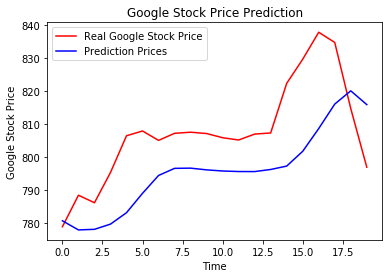

In [100]:
plt.plot(real_stock_prices, color='red', label='Real Google Stock Price')
plt.plot(predictions, color='blue', label='Prediction Prices')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [104]:
mean_absolute_error(real_stock_prices, predictions)

14.447177856445313

In [108]:
(mean_squared_error(real_stock_prices, predictions)) ** 0.5

16.190576449972223